In [ ]:
#from census import Census
#import os 

# Get Api key from user env
#c_apikey = os.environ.get("CENSUS_APIKEY")

#if c_apikey:
    #c = Census(c_apikey)
#else:
    #print("User did not set CENSUS_APIKEY in their environment")

: 

In [5]:
import pandas as pd
file1 = "colonoscopy.csv"
data1 = pd.read_csv(file1, header=None, on_bad_lines="skip")
print(data1.head())  # View the first few rows
print(data1.shape)   # View the number of rows and columns


                                0      1                       2  \
0                          County   FIPS  Model-Based Percent(3)   
1       Ozaukee County, Wisconsin  55089                   89.7    
2           Hockley County, Texas  48219                   85.1    
3  Kingsbury County, South Dakota  46077                   84.9    
4    Stanley County, South Dakota  46117                   84.9    

                               3                              4  
0  Lower 95% Confidence Interval  Upper 95% Confidence Interval  
1                           87.0                           92.1  
2                           77.5                           92.1  
3                           75.9                           92.7  
4                           76.4                           92.4  
(3150, 5)


In [17]:
import pandas as pd

# Define the list of DMV counties and cities
dmv_areas = [
    "Loudoun County, Virginia",
    "Falls Church City, Virginia",
    "Alexandria City, Virginia",
    "Fairfax County, Virginia",
    "District of Columbia",
    "Fairfax City, Virginia",
    "Montgomery County, Maryland",
    "Prince William County, Virginia",
    "Prince Georges County, Maryland",
    "Arlington County, Virginia",
    "Calvert County, Maryland",
    "Charles County, Maryland",
    "Frederick County, Maryland",
    "Stafford County, Virginia",
    "Manassas City, Virginia",
    "Manassas Park City, Virginia",
    "Clark County, Virginia",
    "Fauquier County, Virginia",
    "Spotsylvania County, Virginia",
    "Warren County, Virginia",
    "Fredericksburg City, Virginia",
    "Jefferson County, West Virginia",
]

# Define file paths
file1 = "colonoscopy.csv"
file2 = "household_income.csv"
file3 = "SVI_index.csv"
file4 = "college_educated.csv"
file5 = "pap_smear.csv"

# Load the datasets, specifying headers where applicable
data1 = pd.read_csv(file1, header=None, on_bad_lines="skip")
data1.columns = ["County", "FIPS", "Model-Based Percent(3)", "Lower 95% Confidence Interval", "Upper 95% Confidence Interval"]

data2 = pd.read_csv(file2, on_bad_lines="skip")
data2.columns = ["County", "FIPS", "Rural-Urban Continuum", "Value (Dollars)", "Rank within US"]

data3 = pd.read_csv(file3, on_bad_lines="skip")
data3.columns = ["County", "FIPS", "Rural-Urban Continuum", "Value (Index)"]

data4 = pd.read_csv(file4, on_bad_lines="skip")
data4.columns = [
    "County",
    "FIPS",
    "Rural-Urban Continuum",
    "Value (Percent)",
    "People (Education: At Least Bachelor's Degree)",
    "Rank within US",
]

data5 = pd.read_csv(file5, header=None, on_bad_lines="skip")
data5.columns = ["County", "FIPS", "Model-Based Percent(3)", "Lower 95% Confidence Interval", "Upper 95% Confidence Interval"]

# Filter data for DMV counties and cities
filtered_data1 = data1[data1["County"].isin(dmv_areas)]
filtered_data2 = data2[data2["County"].isin(dmv_areas)]
filtered_data3 = data3[data3["County"].isin(dmv_areas)]
filtered_data4 = data4[data4["County"].isin(dmv_areas)]
filtered_data5 = data5[data5["County"].isin(dmv_areas)]

# Drop FIPS column 
filtered_data1 = filtered_data1.drop(columns=["FIPS"])
filtered_data2 = filtered_data2.drop(columns=["FIPS"])
filtered_data3 = filtered_data3.drop(columns=["FIPS"])
filtered_data4 = filtered_data4.drop(columns=["FIPS"])
filtered_data5 = filtered_data5.drop(columns=["FIPS"])

# Merge all datasets on the 'County' column (no FIPS)
merged_data = pd.merge(filtered_data1, filtered_data2, on="County", how="inner")
merged_data = pd.merge(merged_data, filtered_data3, on="County", how="inner")
merged_data = pd.merge(merged_data, filtered_data4, on="County", how="inner")
merged_data = pd.merge(merged_data, filtered_data5, on="County", how="inner")

# Save the merged data to a new CSV file
output_file = "merged_dmv_data.csv"
merged_data.to_csv(output_file, index=False)

print(f"Merged data saved to {output_file}")



Merged data saved to merged_dmv_data.csv


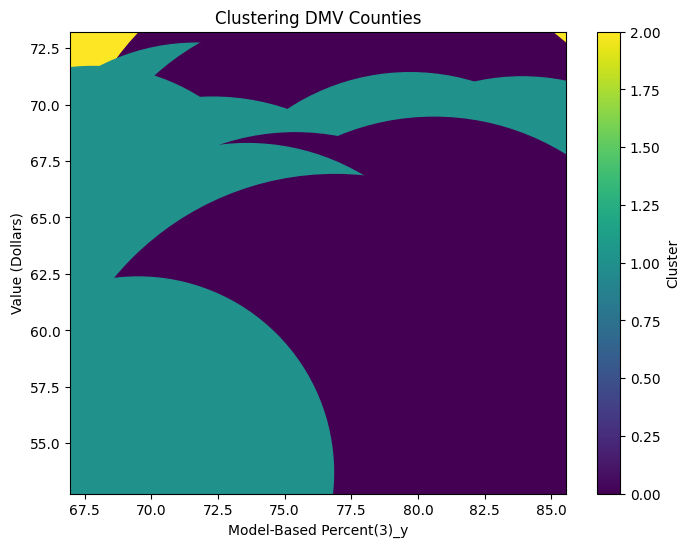

Clustering complete. The data has been saved to 'clustered_dmv_counties.csv'.


In [21]:
#Clustering Based on All Features 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the merged data (from previous step)
df = pd.read_csv('merged_dmv_data.csv')

# Selecting relevant columns for clustering (e.g., excluding FIPS and County)
columns_for_clustering = [
    "Model-Based Percent(3)_y",
     "Model-Based Percent(3)_x",
    "Value (Dollars)",
    "Value (Index)",
    "Value (Percent)"
]
df_cluster = df[columns_for_clustering]

# Handle missing values by filling them with the mean (you can choose a different method)
df_cluster = df_cluster.fillna(df_cluster.mean())

# Standardize the data (important for K-Means clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# K-Means Clustering (adjust the number of clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)  # You can try different values for n_clusters
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters (optional)
plt.figure(figsize=(8, 6))
plt.scatter(df['Model-Based Percent(3)_y'], df['Model-Based Percent(3)_x'], df['Value (Dollars)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Model-Based Percent(3)_y')
plt.ylabel('Value (Dollars)')
plt.title('Clustering DMV Counties')
plt.colorbar(label='Cluster')
plt.show()

# Save the clustered data to a new file
df.to_csv('clustered_dmv_counties.csv', index=False)

print("Clustering complete. The data has been saved to 'clustered_dmv_counties.csv'.")


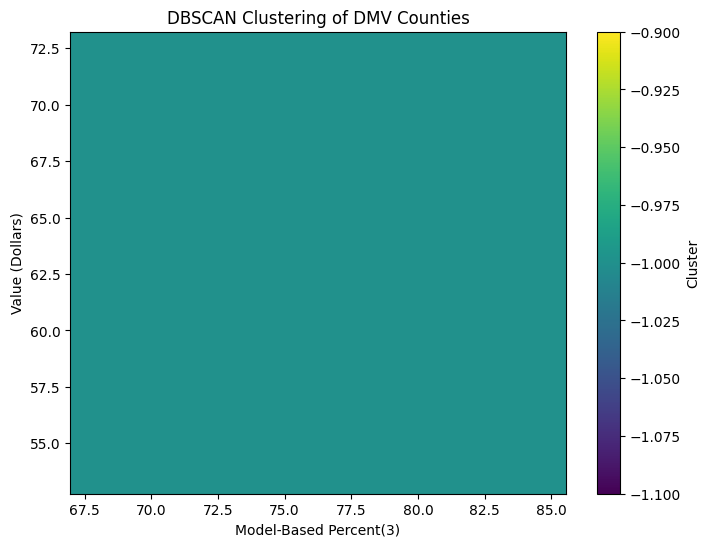

DBSCAN clustering complete. The data has been saved to 'dbscan_clustered_dmv_counties.csv'.


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the merged data (from previous step)
df = pd.read_csv('merged_dmv_data.csv')

# Selecting relevant columns for clustering (e.g., excluding FIPS and County)
columns_for_clustering = [
    "Model-Based Percent(3)_y",
    "Model-Based Percent(3)_x",
    "Value (Dollars)",
    "Value (Index)",
    "Value (Percent)"
]
df_cluster = df[columns_for_clustering]

# Handle missing values by filling them with the mean (you can choose a different method)
df_cluster = df_cluster.fillna(df_cluster.mean())

# Standardize the data (important for DBSCAN clustering)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# DBSCAN Clustering (adjust eps and min_samples as needed)
dbscan = DBSCAN(eps=0.5, min_samples=2)  # eps is the maximum distance between two samples, min_samples is the minimum number of points to form a cluster
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot DBSCAN clustering result
plt.scatter(df['Model-Based Percent(3)_y'], df['Model-Based Percent(3)_x'], df['Value (Dollars)'], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o')
plt.xlabel('Model-Based Percent(3)')
plt.ylabel('Value (Dollars)')
plt.title('DBSCAN Clustering of DMV Counties')
plt.colorbar(label='Cluster')
plt.show()

# Save the clustered data to a new file
df.to_csv('dbscan_clustered_dmv_counties.csv', index=False)

print("DBSCAN clustering complete. The data has been saved to 'dbscan_clustered_dmv_counties.csv'.")


In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv('merged_dmv_data.csv')

# Display the first few rows to confirm successful loading
print(df.head())


In [ ]:
# Disparities by Education 
import pandas as pd

# Filter relevant columns
education_disparities = df[['County', 'Value (Percent)', 'Model-Based Percent(3)_x', 'Model-Based Percent(3)_y']]

# Rename columns for clarity
education_disparities.columns = ['County', 'Education Level (%)', 'Health Screening 1 (%)', 'Health Screening 2 (%)']

# Calculate disparities
education_disparities['Disparity (Screening 1)'] = education_disparities['Health Screening 1 (%)'] - education_disparities['Education Level (%)']
education_disparities['Disparity (Screening 2)'] = education_disparities['Health Screening 2 (%)'] - education_disparities['Education Level (%)']

# Display top counties with highest disparities
top_disparities = education_disparities.sort_values(by='Disparity (Screening 1)', ascending=False)
print(top_disparities.head(10))


In [ ]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for heatmap
heatmap_data = df.pivot_table(
    index='County',
    values=['Value (Percent)', 'Model-Based Percent(3)_x', 'Model-Based Percent(3)_y'],
    aggfunc='mean'
)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap of Education Level and Health Screening Rates")
plt.show()


In [ ]:
# Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define predictors and target
X = df[['Value (Percent)', 'Value (Dollars)']]  # Predictors: Education Level, Income
y = df['Model-Based Percent(3)_x']  # Target: Health Screening Rate

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")


In [ ]:
# Clustering Part 2
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['Value (Percent)', 'Value (Dollars)', 'Model-Based Percent(3)_x']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.pairplot(df, hue='Cluster', vars=['Value (Percent)', 'Value (Dollars)', 'Model-Based Percent(3)_x'])
plt.show()


In [ ]:
# Rankings and Trends
# Sort by health screening rate
sorted_df = df.sort_values(by='Model-Based Percent(3)_x', ascending=False)

# Display top 10 counties
print("Top 10 Counties by Health Screening Rate:")
print(sorted_df[['County', 'Model-Based Percent(3)_x']].head(10))

# Plot trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=sorted_df, x='Value (Percent)', y='Model-Based Percent(3)_x', marker='o')
plt.title("Trends: Education Level vs Health Screening Rates")
plt.xlabel("Education Level (%)")
plt.ylabel("Health Screening Rate (%)")
plt.show()


In [ ]:
# Correlation Analysis
# Correlation matrix
correlation_matrix = df[['Value (Percent)', 'Value (Dollars)', 'Model-Based Percent(3)_x']].corr()

# Display correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Analysis")
plt.show()
